## kEMR91OsF_Assignment_1_NLP

<img src = "aaaaa.jpg">

#### In this work, we aim to create a Natural Language Processing word2vec model from scratch and to evaluate its performance. Initially, as requested in the preamble of the exercise, we have to do this in a dataset which is the combination of four text files. But due to the computational problem of our computer we will do the work only on a small part of the data.

In [1]:
# import the necessary libraries 
import pandas as pd
import numpy as np
import nltk
import string

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import contractions

#### We import the data for our file

In [2]:
text = open("C:/Users/ACER/Documents/AIMS CAMEROON 2022/ASSIGNMENT_/Review block 6 april/Text Data/text_use_new.txt",  encoding="utf-8").read()
text[0:100].split('\n')

['',
 'Experimental Work in Agriculture in the German Colonies,” tells us that',
 'in Cameroon, as in other pa']

## 1- Data preprocessing

To pre-process the data we started by create a new dataframe file (text_use_new.txt) where we just collected a few part of the text in a document because of the computational power of the comuputer. After that we delated manually all the content table of the document. After importing the data into python environment, we convert the all text into lower caces, we removed the all punctuations, we solve the issue of contraction form and we delated all the stopword by using different functions as its shoes below.

In [3]:
# We convert the data into lower cases

text = text.lower()
text[0:100].split('\n')  # print of the first 100 characters in the text

['',
 'experimental work in agriculture in the german colonies,” tells us that',
 'in cameroon, as in other pa']

In [4]:
# We reconvert the contracted form into the normal form

text = contractions.fix(text)
text[0:100].split('\n')   # print of the first 100 characters in the text

['',
 'experimental work in agriculture in the german colonies,” tells us that',
 'in cameroon, as in other pa']

In [5]:
string.punctuation    # The general punctution 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
# we remove the ponctuation using the following function

def revome_all_punctuation(text):
    punctuations = string.punctuation
    return text.translate(str.maketrans('','',punctuations))

In [7]:
text1 = revome_all_punctuation(text)   # using our function we remove the punctuation in the text.

In [8]:
# looking for the way to to increase the performance of the model that we are going to build:
# we remove all the stopword in the text

from nltk.corpus import stopwords
Stopwords = set(stopwords.words('english'))

def remove_Stopwords(text):   # function in charge of revome the stopword
    return " ".join([word for word in text.split() if word not in Stopwords])

In [9]:
# By calling the previous function for the task we remove the stopword

text2 = remove_Stopwords(text = text1)
#text2.split('\n')

## 2- Tokenization 

#### In this section we are going to split the text document into single unit called tokens

In [10]:
# we inport the library and we write the function in charge to plit the text into tokens.

import re

def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

In [11]:
# We write the function that marge the different tokens and the id position.

In [12]:
def mapping(tokens):
    '''create a map between tokens and indices'''
    word_to_id = {}
    id_to_word = {}
    
    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token
    
    return word_to_id, id_to_word

In [13]:
# we called the function that split the text into tokens
tokens = tokenize(text2)

In [14]:
# we marge the word and index using the mapping fuction above

word_to_idex, idex_to_word = mapping(tokens)
#word_to_idex

## 3- data creation

In this section we are going to generate the training data from the data text that we have processed.

In [15]:
# We are using this function for the task.

np.random.seed(42)
def generate_training_data(tokens, word_to_idex, window):
    X = []
    y = []
    n_tokens = len(tokens)
    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i), 
            range(i, min(n_tokens, i + window + 1))
        )
        for j in idx:
            if i == j:
                continue
            X.append(one_hot_encode(word_to_idex[tokens[i]], len(word_to_idex)))
            y.append(one_hot_encode(word_to_idex[tokens[j]], len(word_to_idex)))
    
    return np.asarray(X), np.asarray(y)


def concat(*iterables):
    for iterable in iterables:
        yield from iterable


def one_hot_encode(id, vocab_size):
    res = [0] * vocab_size
    res[id] = 1
    return res

In [16]:
# final generation of training data with window = 3 for three words before and after for the prediction. X features and y target

X, y = generate_training_data(tokens, word_to_idex, 3) 

In [17]:
# we check here the shape of each set of data

print('The shape the the features is {}, and target shape is {}'.format(X.shape , y.shape))

The shape the the features is (11838, 1120), and target shape is (11838, 1120)


## 4- Embedding Model

In this section we are going to creat the model, for that, we start by the embedding of that is the part that take each words and create correspoding vectors representative of the word.

In [18]:
# definition of the function of the model

def init_network(vocab_size, n_embedding):
    model = {
        "w1": np.random.randn(vocab_size, n_embedding),
        "w2": np.random.randn(n_embedding, vocab_size)
    }
    return model

In [19]:
# model creation by using the above function.
# we choce to represeent the embedding with 10 elements.
# with means that our model will represent each predicted word with a vector of 10 elements, and for the cluster checking
# we will find the Principal component analysis to represent the cluser words.

model = init_network(len(word_to_idex), 10) 

In [20]:
 # len of the word index
print('The number of works in the model is {}.'.format(len(word_to_idex)))

The number of works in the model is 1120.


In [21]:
model["w1"]     # we check the weight element in the model (10 elements per line)

array([[ 0.49671415, -0.1382643 ,  0.64768854, ...,  0.76743473,
        -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, ...,  0.31424733,
        -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , ...,  0.37569802,
        -0.60063869, -0.29169375],
       ...,
       [ 0.89445884,  0.33437475, -1.18581491, ...,  0.93342295,
        -0.36171699,  0.17866978],
       [-3.3755791 , -0.44965019,  0.76390291, ...,  0.54846327,
         0.8254146 , -1.72621396],
       [-0.16045004, -0.28011101, -0.28057171, ...,  1.77729477,
         0.48384113, -0.0423319 ]])

## 5- Forward Propagation 

In this section we are going to do the forward propagation, the process where the model is try to use different weights for the prediction

In [22]:
# function for forward propagation.

def forward(model, X, return_cache=True):
    cache = {} # empty list creat
    cache["a1"] = X @ model["w1"]  
    cache["a2"] = cache["a1"] @ model["w2"]
    cache["z"] = softmax(cache["a2"])
    
    if not return_cache:
        return cache["z"]
    
    return cache

In [23]:
# check the dimensionality of the matrices

(X @ model["w1"]).shape

(11838, 10)

## 6- BackpropagationPermalink

In this section, the aim is to update the different wieghts.

In [24]:
# function for the wieght optimization.

def backward(model, X, y, alpha):
    
    cache  = forward(model, X)

    da2 = cache["z"] - y
    dw2 = cache["a1"].T @ da2
    
    da1 = da2 @ model["w2"].T
    dw1 = X.T @ da1
    
    assert(dw2.shape == model["w2"].shape)
    assert(dw1.shape == model["w1"].shape)
    
    model["w1"] -= alpha * dw1
    model["w2"] -= alpha * dw2
    
    return cross_entropy(cache["z"], y)


In [25]:
def cross_entropy(z, y):
    return - np.sum(np.log(z) * y)

def softmax(X):
    res = []
    for x in X:
        exp = np.exp(x)
        res.append(exp / exp.sum())
    return res

## 7- Train of the model


In this section, we are going now to apply the mains above function and train the model for the prediction.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")

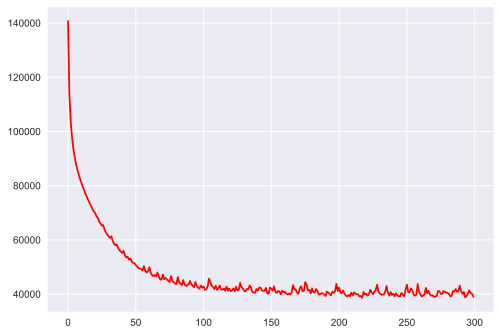

In [27]:
n_iter =   300 #50 #1000                   # number of iteration
learning_rate = 0.01      # 0.01      # rate


history = [backward(model, X, y, learning_rate) for _ in range(n_iter)]

plt.plot(range(len(history)), history, color="red") # color=  skyblue
plt.show()

## 8- Check the performance.


In this section, we are going to predict the word and see whether the predicted word and the original word are correlated.

In [29]:
# prediction of word "government"

learning = one_hot_encode(word_to_idex["government"], len(word_to_idex))
result = forward(model, [learning], return_cache=False)[0]

for word in (idex_to_word[id] for id in np.argsort(result)[::-1]):
    print(word) # we print the list of element in the text that are similar to the word according to the model.

togoland
cameroon
paid
years
proclamation
german
wilderlooking
place
beyond
government
generally
april
seen
alive
attend
everything
case
truantry
garna
order
first
fees
third
colonial
position
attendance
except
year
fact
revenue
anxious
agriculture
tropical
economic
30s
togo
away
principal
heights
has
week
colonies
pupils
results
included
second
explain
laid
qualify
internal
principle
pool
office
grade
25th
service
bows
hidden
cunningly
emblem
humanity
regular
infant
per
lastly
statement
apparently
inaccessible
seemed
vegetation
organising
allowed
develop
50s
appears
began
five
crown
less
boys
remain
hippopotami
europeans
objects
women
never
entering
parts
freely
organisation
instruction
annum
tendency
reason
elementary
months
extent
holidays
expenditure
lasted
probable
kind
bridgemaking
according
side
mazes
school
class
made
arrows
cost
important
methods
cure
several
obligatory
forty
thirtyfive
races
native
largest
mission
last
trade
obliged
european
date
woman
slavedealing
length
cow

##### From this result above we can see that model is predicted the well the "government" in the text. We see that "cameroon" is a closest word for government. 

## Embeddings checking 

In [30]:
# embeddinng function

def get_embedding(model, word):
    try:
        idx = word_to_idex[word]
    except KeyError:
        print("`word` not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_idex))
    return forward(model, one_hot)["a1"]

In [31]:
# we get the single embedding of a word cameron to see the corresponding vector.
get_embedding(model, "cameroon") # a vector of 10 element because we choose 10 as number of element in the model

array([-0.08223459,  0.27772532,  0.06352495,  0.73178675,  0.521438  ,
        0.15455771, -0.73998734,  0.0147408 , -0.48356264,  0.36164826])

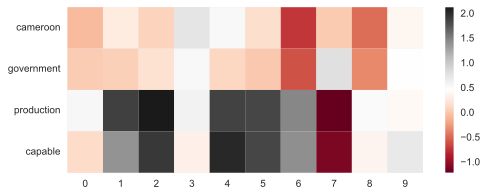

In [32]:
# In this figure below, afetr getting the embedding of a certain sample of words, we check the similarities between them.

plt.figure(figsize=(8,3))  # dencity of the words
df = pd.DataFrame({'cameroon': get_embedding(model, "cameroon"),
                   'government': get_embedding(model, "government"),
                   'production': get_embedding(model, "production"),
                   'capable': get_embedding(model, 'capable'),
                  })
sns.heatmap(df.T, fmt="g", cmap='RdGy')
plt.show()

From the graph above we can see by looking the level and the colors that "government" is close to "cameroon" and less closer to "production" and "capable" which is a good prediction according to the text that we are using. By conclusion the model is performing well on the data.

In [33]:
# We create the big dataframe from the predicted word by getting the embedding of each work reprentation.
words_list = tokens # list of the words
dictq ={}           # empty dictionary that will contain the data 
for word in words_list:
    dictq[word]=get_embedding(model, word)

# the data name is dfa
dfa= pd.DataFrame(dictq)
dfa

,experimental,work,agriculture,german,colonies,tells,us,cameroon,parts,land,...,hide,expert,drums,signalling,messages,sent,code,throughout,rapidity,accuracy
0,-0.613075,-0.020803,-0.500402,-0.156220,-0.364215,-0.765890,-0.743748,-0.082235,-0.398581,0.334396,...,1.460518,0.390922,0.580378,1.182078,1.167259,1.785799,2.323602,2.495173,1.722845,2.442039
1,0.723940,0.375985,0.364991,0.861670,0.453646,0.374870,0.259141,0.277725,0.355771,-0.227442,...,2.332291,1.799675,1.168948,1.124091,-0.110460,0.190384,0.202515,-0.863908,-0.593211,-1.050321
2,-0.754788,-0.383300,0.124623,1.199755,0.058033,-0.189049,0.398683,0.063525,1.323721,0.830414,...,0.448621,1.126814,1.977846,2.546686,1.329738,1.688987,2.081015,1.030565,0.641946,0.805429
3,1.445548,0.505328,0.643230,2.655759,0.753193,1.754671,0.697468,0.731787,1.891728,1.027980,...,-2.491162,-2.493470,-1.398825,-1.947317,-1.920562,-1.824169,-1.012100,-1.268954,0.768775,-0.300712
4,1.680245,0.990891,0.704354,-1.579086,1.611722,2.238228,1.571589,0.521438,2.814227,2.186124,...,0.310715,0.776854,0.346380,-0.450883,0.395434,0.618243,-1.128396,1.503714,0.989133,1.565433
5,-0.618636,-0.375049,0.248768,-0.638070,0.505775,0.443665,1.062147,0.154558,2.312948,-0.097314,...,-1.417925,-3.018860,-2.454338,-1.906248,-2.829918,-2.063524,-1.338783,-1.281535,-1.549343,-0.608621
6,-0.766456,1.081588,-0.219749,2.141945,-0.588237,-0.968275,-0.861049,-0.739987,-1.160947,0.101090,...,0.196541,0.542036,0.029970,0.899837,0.577328,0.007870,0.357541,-0.613208,0.050411,-0.984144
7,0.493025,0.502620,0.354918,1.189864,0.705786,0.793843,0.859382,0.014741,-0.613015,-0.148316,...,-0.539817,0.288543,0.210093,-0.059270,0.842252,1.520873,1.586703,0.795164,0.964109,0.373774
8,-0.908376,0.199253,0.301780,-0.735711,-1.229569,-1.681578,-1.727112,-0.483563,-1.246855,-0.219798,...,-2.282045,-1.311707,-2.739123,-2.110509,-1.264891,-0.884689,-0.938994,-0.389659,-0.005833,0.293969
9,0.915950,-0.089611,0.566054,2.396269,0.510908,0.207446,0.546811,0.361648,1.135929,0.673212,...,-0.596581,-0.900988,-0.880962,-1.497870,-1.322805,-0.818509,-1.505568,-1.848910,-2.905621,-1.927125


The above data fram present the all work in our text and the corresponding embedding vector that is generated by the get_embedding function. We are going to use this dataframe to perform the PCA (Principal Component Analysis) and plot the graph of different cluster words.

In [48]:
# other necessary libraries
import gensim
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
#from gensim.models import word2vec

In [49]:
# transpose form of the data.

the_text_data = dfa.T 

In [50]:
# save of the transpose form of the data into .txt file.

the_text_data.to_csv('the_text_data_new.txt', sep='\t', index=True)  

In [51]:
# adjust the path relative to the the_text_data_new file that we have created above

glove_path = "C:/Users/ACER/Documents/AIMS CAMEROON 2022/ASSIGNMENT_/Review block 6 april/the_text_data_new.txt"
glove_file = datapath(glove_path)
word2vec_glove_file = get_tmpfile("the_text_data_new.word2vec.txt")

glove2word2vec(glove_file, word2vec_glove_file)
word2vec = KeyedVectors.load_word2vec_format(word2vec_glove_file)

C:\Users\ACER\AppData\Local\Temp\ipykernel_2964\1485154674.py:7: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


In [52]:
# number of words in the model

print ("# of words", len(word2vec.key_to_index))

# of words 1121


In [53]:
# In this fuction, we are checking the level of similarity between two words by using the different embedding vectorc 
# corresponding.

def Similarity_check(vect_1, vect_2):
    distance = 0.0
    # Compute the dot product between u and v (≈1 line)
    dot = np.sum(vect_1*vect_2)
    # Compute the L2 norm of vect_1 (≈1 line)
    norm_vect_1 = np.sqrt(np.sum(vect_1**2))
    
    # Compute the L2 norm of vect_2 (≈1 line)
    norm_vect_2 = np.sqrt(np.sum(vect_2**2))
    # Compute the cosine similarity defined by formula (1) (≈1 line)
    Similarity = dot/(norm_vect_1*norm_vect_2)
    
    return Similarity

In [54]:
# In this cell we test the above function for the similarly and we see that the two words are close to each other since the 
# the return similarty coefficient is very close to 1.
cult = get_embedding(model, "culture")
pltt = get_embedding(model,"plantation")

print('The predict similarity between the two words that we have shooce is : {}. \n Wich show us how they are correlated.'.format(Similarity_check(cult,pltt)))

The predict similarity between the two words that we have shooce is : 0.936955058067725. 
 Wich show us how they are correlated.


In [55]:
def Analogy_of_words_check(word_a, word_b, word_c):
    # we first convert all the words into lower case 
    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    # Get the word embeddings v_a, v_b and v_c (≈1-3 lines)
    e_a, e_b, e_c = get_embedding(model,word_a), get_embedding(model,word_b), get_embedding(model,word_c)
    words = list(word_to_idex)
    max_cosine_sim = -100              # Initialize max_cosine_sim to a large negative number
    best_word = None 
    for w in words:        
        # to avoid best_word being one of the input words, pass on them.
        if w in [word_a, word_b, word_c]:
            continue
        
        # Compute cosine similarity between the vector (e_b - e_a) and the vector ((w's vector representation) - e_c)  (≈1 line)
        F=get_embedding(model,w)
        cosine_sim = Similarity_check(e_b-e_a, F-e_c)
        # we chect the distance between the cosine and the maxcosin
        # after we check the distance to get the best neighrest predicted word
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
    
        
    return best_word

In [56]:
predict_word =  Analogy_of_words_check('production', 'capable', 'allowed')

print('The predict word from the three words above is : {}'.format(predict_word))

The predict word from the three words above is : often


From the prediction using the above fuction, we can see that the fourth word that we model function predict is given the meaning to the three word

### Apply the Principal components analysis for dimenssionality reduction for the data that we have collected from the word ond the different embedding. we represent also the main two first components on what we are going to plot the remimders to see the clusters.

In [63]:

def plan_plot_creation(data):
    # evaluation of the correlation matrix of the input data
    corr_data = data.corr()
    EigenVa, EigenVect = np.linalg.eig(corr_data) # eigen parameters evaluation (vectors and values)
    main_val = (-EigenVa).argsort()               # find the main component (best eigenvalues)
    corres_val = EigenVect[main_val]              # correspond eigenvectors
    EigenVect = EigenVect[:,main_val]
    main_vect_1_2 = EigenVect[:,:2]               # Two first principals vectors
    X = data.to_numpy()                           # convert the data into numpy array
    new_X = X@main_vect_1_2 
    
    return new_X


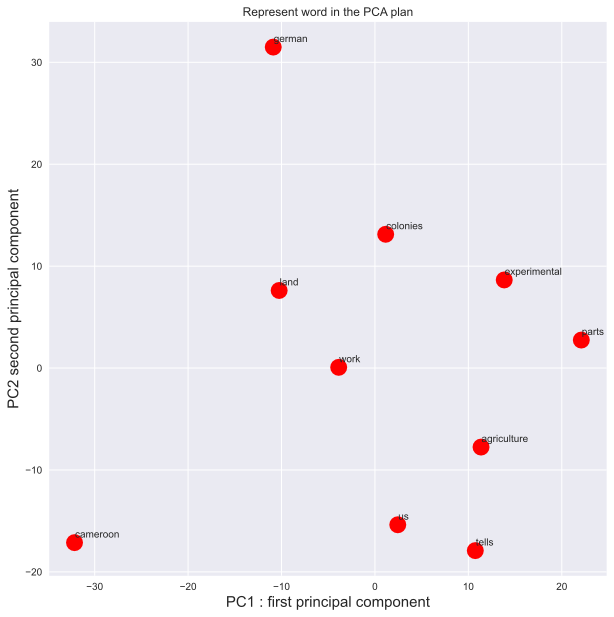

In [68]:
# plot of the words in the plan of principle components
# we can see in the plot below a sampleof some words and to which one they are better close to.

new_X = plan_plot_creation(data = dfa)

plt.figure(figsize = (10,10))
plt.scatter(new_X[:,0],new_X[:,1], linewidths=10, color = 'red')
plt.xlabel('PC1 : first principal component', size = 15)
plt.ylabel('PC2 second principal component', size = 15)
plt.title('Represent word in the PCA plan')
for word, (x,y) in zip(words_list, new_X):
    plt.text(x+0.05, y+0.5, word)

I the following cell below we are going to represent the custers words in a plan represent by these two principal componenets

In [69]:
# The fnction below is use to represent the word clusters

In [70]:
def display_pca_scatterplot(model, words):
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

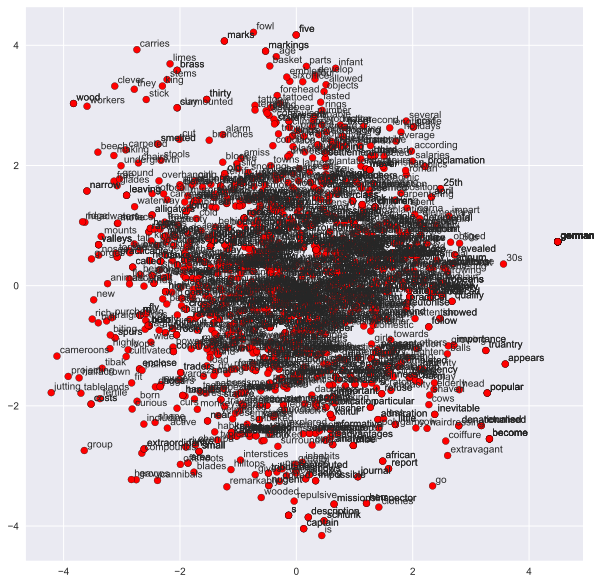

In [71]:
display_pca_scatterplot(dictq, words_list)

In this figure above we can see that the words are clusters to each other, and since the visualisation is not well clear. in the figure bellow we are going to plot some few words to evaluate the distace between them.

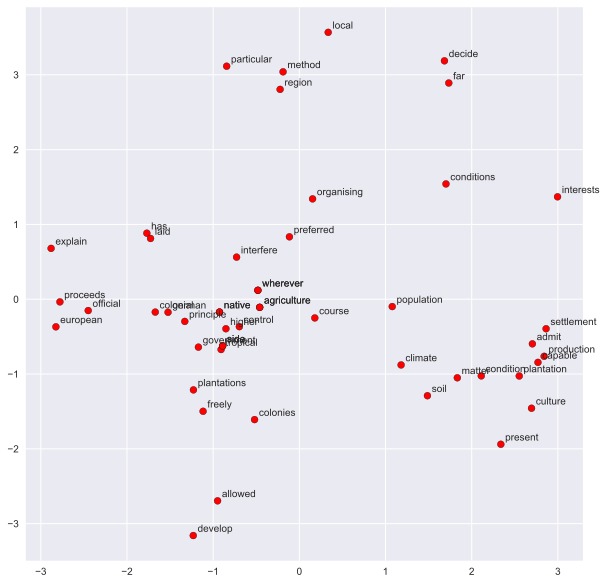

In [72]:


few_word_list = ['course','native','local','interest','interfere','region','culture','plantation']
display_pca_scatterplot(dictq,words_list[50:100] ) # words_list[50:100]

From the new figure above we can see that the clusters of words are good. Looking the concrets example like "culture" and "plantation" that are very much close, "interfere" and "region", "controle" and "condition" for just list few examples.
In conclusion, the model is perfoforming well after all the interpretation of the intrinsic evaluation.

As we mention the lower power compution of our computer in the introduction of this work, the model in this work was train just in a few paragraphs of text collected from one of the four document that we recieved for the task.

We can note that in spite of the performance  of the model, they could have been even better if the data of elaboration had been the sum of the four text files which was given to us. For this reason we propose in the future works an improvement of these works by using a computer which has a good power of calculation. Or a possible training of the model in the cloud because the greatest difficulty encountered in this work was during this phase.